IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning. Find the most voted movie in IMDB Movie Database. Print the movie name and the rating of that movie.

In [13]:
import sqlite3
import pandas as pd
db = sqlite3.connect('IMDB.sqlite')
imdb = pd.read_sql_query("SELECT * FROM IMDB", db)
earning = pd.read_sql_query("SELECT * FROM earning", db)
genre = pd.read_sql_query("SELECT * FROM genre", db)
movie = imdb[imdb["TotalVotes"] == imdb["TotalVotes"].max()]
print(movie.Title.values[0], movie.Rating.values[0])

Inception (2010) 8.8


IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning. Find the Movie with Longest-Running Time from IMDB Movie database. Print the name of movie and running time as integer value.

In [19]:
import sqlite3
import pandas as pd
db = sqlite3.connect('IMDB.sqlite')
imdb = pd.read_sql_query("SELECT * FROM IMDB", db)
earning = pd.read_sql_query("SELECT * FROM earning", db)
genre = pd.read_sql_query("SELECT * FROM genre", db)
def changeRuntime(s):
    if s == "":
        return 0
    return int(s[:-3])
    print(s)
imdb["Runtime"] = imdb["Runtime"].apply(changeRuntime)
movie = imdb[imdb["Runtime"] == imdb["Runtime"].max()]
print(movie.Title.values[0], movie.Runtime.values[0])

The Wolf of Wall Street (2013) 180


IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [45]:
import sqlite3
import pandas as pd
db = sqlite3.connect('IMDB.sqlite')
imdb = pd.read_sql_query("SELECT * FROM IMDB", db)
earning = pd.read_sql_query("SELECT * FROM earning", db)
genre = pd.read_sql_query("SELECT * FROM genre", db)
movie_earning = pd.merge(imdb, earning, on = "Movie_id")
movie_earning = movie_earning[movie_earning["Budget"] != '']
movie_earning["Budget"] = pd.to_numeric(movie_earning["Budget"])
movie_earning["Total"] = movie_earning["Domestic"] + movie_earning["Worldwide"] - movie_earning["Budget"]
movie = movie_earning[movie_earning["Budget"] == movie_earning["Budget"].min()]
movie = movie[movie["Total"] == movie["Total"].max()]
print(movie.Title.values[0])

Short Term 12 (2013)


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.


In [65]:
import sqlite3
import pandas as pd
db = sqlite3.connect('IMDB.sqlite')
imdb = pd.read_sql_query("SELECT * FROM IMDB", db)
earning = pd.read_sql_query("SELECT * FROM earning", db)
genre = pd.read_sql_query("SELECT * FROM genre", db)
movie_earning = pd.merge(imdb, earning, on = "Movie_id")
movie_earning["Grossing"] = movie_earning["Domestic"] + movie_earning["Worldwide"]
def getYear(title):
    return int(title.split()[-1][1:-1])
movie_earning["Year"] = movie_earning["Title"].apply(getYear)
years = sorted(movie_earning["Year"].unique())
for y in years:
    movie = movie_earning[movie_earning["Grossing"] == movie_earning[movie_earning["Year"] == y]["Grossing"].max()]
    print(y, movie.Title.values[0])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
Print the movie name.
Movies has multiple genre.

In [115]:
import sqlite3
import pandas as pd
db = sqlite3.connect('IMDB.sqlite')
imdb = pd.read_sql_query("SELECT * FROM IMDB", db)
earning = pd.read_sql_query("SELECT * FROM earning", db)
genre = pd.read_sql_query("SELECT * FROM genre", db)
genre = genre[genre["genre"] != ""]
def fillGenre(moive_id):
    return genre[genre["Movie_id"] == moive_id]["genre"].unique()
imdb["Genre"] = imdb["Movie_id"].apply(fillGenre)
def f(row):
    return row["Rating"] >= 8 and "Mystery" in row["Genre"] and "Sci-Fi" in row["Genre"];
imdb = imdb[imdb.apply(f, axis = 1)]
print(imdb.Title.values[0])

Arrival (2016)


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

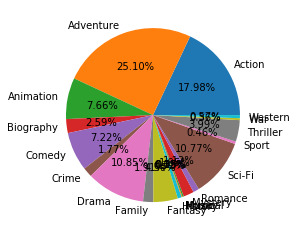

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


In [225]:
## Open and read data file as specified in the question
## Print the required output in given format
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
db = sqlite3.connect('IMDB.sqlite')
imdb = pd.read_sql_query("SELECT * FROM IMDB", db)
earning = pd.read_sql_query("SELECT * FROM earning", db)
genre = pd.read_sql_query("SELECT * FROM genre", db)
imdb["Budget"].fillna(0, inplace = True)
imdb.loc[imdb["Budget"] == "", "Budget"] = 0
genre.drop(genre[genre["genre"] == ""].index, inplace = True)
d = {}
for i in range(len(genre.Movie_id.values)):
    m = genre.Movie_id.values[i]
    d[genre.genre.values[i]] = d.get(genre.genre.values[i], 0) + imdb[imdb.Movie_id == m].Budget.values[0]
df2 = pd.DataFrame(list(d.items()), columns=['Genre', 'TotalBudget'])
df2.sort_values(by = "Genre", ascending = True, inplace = True)
plt.pie(df2.TotalBudget.values, labels = df2.Genre.values, autopct = "%.2f%%")
plt.show()

for i in range(len(df2.TotalBudget.values)):
    print(df2.Genre.values[i], format(100 * df2.TotalBudget.values[i] /df2.TotalBudget.values.sum(), '.2f'))

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.
Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.


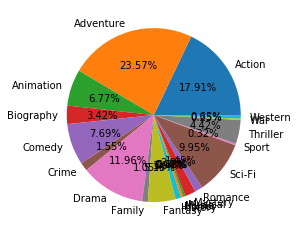

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


In [232]:
## Open and read data file as specified in the question
## Print the required output in given format
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
db = sqlite3.connect('IMDB.sqlite')
imdb = pd.read_sql_query("SELECT * FROM IMDB", db)
earning = pd.read_sql_query("SELECT * FROM earning", db)
genre = pd.read_sql_query("SELECT * FROM genre", db)
earning["total"] = earning["Domestic"] + earning["Worldwide"]
earning
genre.drop(genre[genre["genre"] == ""].index, inplace = True)
d = {}
for i in range(len(genre.Movie_id.values)):
    m = genre.Movie_id.values[i]
    d[genre.genre.values[i]] = d.get(genre.genre.values[i], 0) + earning[earning.Movie_id == m].total.values[0]
df2 = pd.DataFrame(list(d.items()), columns=['Genre', 'TotalBudget'])
df2.sort_values(by = "Genre", ascending = True, inplace = True)
plt.pie(df2.TotalBudget.values, labels = df2.Genre.values, autopct = "%.2f%%")
plt.show()

for i in range(len(df2.TotalBudget.values)):
    print(df2.Genre.values[i], format(100 * df2.TotalBudget.values[i] /df2.TotalBudget.values.sum(), '.2f'))